In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [46]:
directory = 'C:/Users/geeze/Box/biocircuits/Reed/Projects/micro_consortia/DARPA_biocon/Task 1.1/A+pTet-ccdA/20200219 capnresc 4 chi bio test/'
file = '2020-02-01 19_10_31_M1_data.csv'

In [47]:
df = pd.read_csv(directory + file)

df.head()

,exp_time,od_measured,od_setpoint,od_zero_setpoint,thermostat_setpoint,heating_rate,internal_air_temp,external_air_temp,media_temp,opt_gen_act_int,...,FP2_emit2,FP3_base,FP3_emit1,FP3_emit2,custom_prog_param1,custom_prog_param2,custom_prog_param3,custom_prog_status,zigzag_target,growth_rate
0,0.31,0.059999,0.50,26725.0,37.0,1.000000,25.0000,29.6250,24.15,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60.38,0.506770,0.25,26725.0,37.0,1.000000,25.5625,29.5625,28.05,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,217.55,0.488290,0.25,26725.0,37.0,1.000000,27.6250,29.4375,32.89,0.0,...,0.033944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,277.62,0.487590,0.25,26725.0,37.0,0.633975,28.3750,29.3750,35.61,0.0,...,0.034007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,420.98,-0.106145,0.25,26725.0,37.0,1.000000,27.8125,29.4375,30.43,0.0,...,0.059083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df.columns

Index(['exp_time', 'od_measured', 'od_setpoint', 'od_zero_setpoint',
       'thermostat_setpoint', 'heating_rate', 'internal_air_temp',
       'external_air_temp', 'media_temp', 'opt_gen_act_int', 'pump_1_rate',
       'pump_2_rate', 'pump_3_rate', 'pump_4_rate', 'media_vol',
       'stirring_rate', 'LED_395nm_setpoint', 'LED_457nm_setpoint',
       'LED_500nm_setpoint', 'LED_523nm_setpoint', 'LED_595nm_setpoint',
       'LED_623nm_setpoint', 'LED_6500K_setpoint', 'laser_setpoint',
       'LED_UV_int', 'FP1_base', 'FP1_emit1', 'FP1_emit2', 'FP2_base',
       'FP2_emit1', 'FP2_emit2', 'FP3_base', 'FP3_emit1', 'FP3_emit2',
       'custom_prog_param1', 'custom_prog_param2', 'custom_prog_param3',
       'custom_prog_status', 'zigzag_target', 'growth_rate'],
      dtype='object')

In [49]:
df['hrs'] = df['exp_time']/(60*60)

Text(0, 0.5, 'OD600')

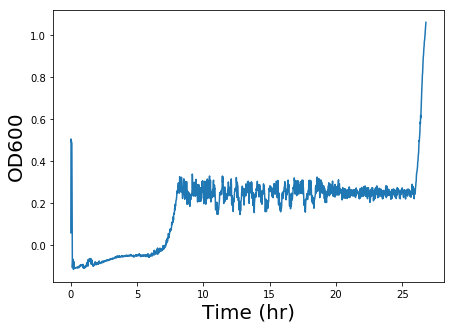

In [68]:
plt.rc('axes', labelsize=20)

fig, ax = plt.subplots(figsize=(7,5))

df.plot(x='hrs', y='od_measured', legend=False, ax=ax, linewidth=1.5)

plt.xlabel('Time (hr)')
plt.ylabel('OD600')

## runaway growth after hr 26 due to no medium i assume
## hits control point at hr 8.25
## induced at hr 20

In [75]:
inside = (df['hrs'] > 8.25) & (df['hrs'] < 26)
no_ind = (df['hrs'] > 8.25) & (df['hrs'] < 20)
ind = (df['hrs'] > 20) & (df['hrs'] < 26)

Text(0, 0.5, 'OD600')

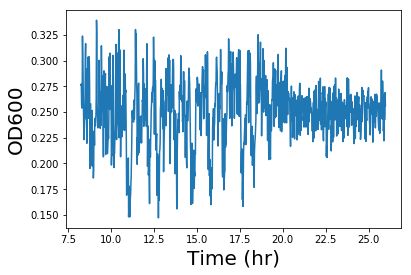

In [72]:
df.loc[inside].plot(x='hrs', y='od_measured', legend=False)
plt.xlabel('Time (hr)')
plt.ylabel('OD600')

Text(0, 0.5, 'Dilution pump rate')

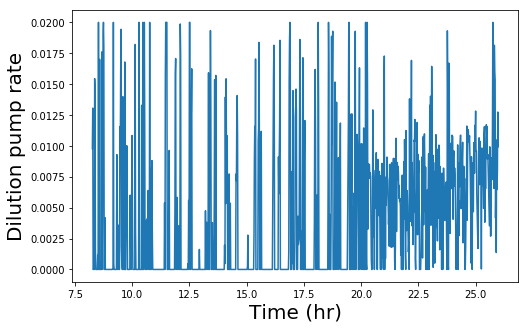

In [91]:
fig, ax = plt.subplots(figsize=(8,5))
df.loc[inside].plot(x='hrs', y='pump_1_rate', legend=False, ax=ax)
plt.xlabel('Time (hr)')
plt.ylabel('Dilution pump rate')


In [79]:
df.loc[ind, 'pump_1_rate'] = 1
df.loc[no_ind, 'pump_1_rate'] = 0

0.00640248017555122

(-0.001, 0.025)

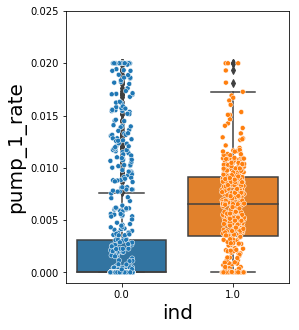

In [119]:
fig, ax = plt.subplots(figsize=(4,5))
sns.boxplot(x = 'ind', y = 'pump_1_rate', data=df)
sns.stripplot(x = 'ind', y = 'pump_1_rate', data=df, edgecolor='white', linewidth=0.5)
plt.ylim([-0.001, 0.025])

In [96]:
window = df.loc[~df['ind'].isnull()]

In [102]:
pos_win = window.loc[window['pump_1_rate'] != 0]

(-0.001, 0.025)

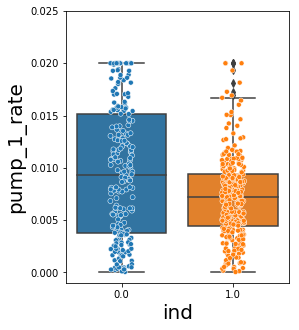

In [120]:
fig, ax = plt.subplots(figsize=(4,5))
sns.stripplot(x = 'ind', y = 'pump_1_rate', data=pos_win, edgecolor='white', linewidth=0.5)
sns.boxplot(x = 'ind', y = 'pump_1_rate', data=pos_win)
plt.ylim([-0.001, 0.025])

In [105]:
pos_win.loc[pos_win['ind'] == 1, 'pump_1_rate'].mean()

0.007160406177641395

In [106]:
pos_win.loc[pos_win['ind'] == 0, 'pump_1_rate'].mean()

0.00956244141006211